In [1]:
import numpy as np
import MARBLE

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [ ]:
path = '../'

np.save

In [3]:
with open('../SeED/dataset/Xs.pkl','rb') as file:
    
    raw_data = pickle.load(file)
    
from sklearn import preprocessing

X_trains = []
X_tests = []

for i in range(3):
    X_normalized = preprocessing.MinMaxScaler().fit_transform(raw_data[i])

    train_data = X_normalized[:500]
    test_data = X_normalized[500:500+320]
    X_trains.append(train_data)
    X_tests.append(test_data)

In [5]:
X_tests[0].shape

(320, 100)

In [28]:
Train_data_marble = MARBLE.construct_dataset(anchor=[train_data], vector=[train_data], k =100)
Test_data_marble = MARBLE.construct_dataset(anchor=[test_data], vector=[test_data], k =100)


---- Embedding dimension: 100
---- Signal dimension: 100
---- Computing kernels ... 
---- Computing full spectrum ...
              (if this takes too long, then run construct_dataset()
              with number_of_eigenvectors specified) 
---- Embedding dimension: 100
---- Signal dimension: 100
---- Computing kernels ... 
---- Computing full spectrum ...
              (if this takes too long, then run construct_dataset()
              with number_of_eigenvectors specified) 

In [30]:
params = {'epochs': 1000, #optimisation epochs
          'hidden_channels': 10, #number of internal dimensions in MLP
          'out_channels': 2,
          'inner_product_features': False, ## Control over the embedding-aware or agnostic 
         }
model = MARBLE.net(Train_data_marble, params= params, )



---- Settings: 

epochs : 1000
hidden_channels : [32]
out_channels : 2
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
dropout : 0.0
batch_norm : batch_norm
bias : True
order : 2
diffusion : True
frac_sampled_nb : -1
include_positions : False
include_self : True
vec_norm : False
emb_norm : False
seed : 0
dim_signal : 100
dim_emb : 100
n_sampled_nb : -1

---- Number of features to pass to the MLP:  1010100
---- Total number of parameters:  32323363

Using device cuda:0


In [31]:
model.fit(Train_data_marble)


---- Training network ...

---- Timestamp: 20250612-192642

 *och: 0, Training loss: 1.480389, Validation loss: 1.4487, lr: 0.0100
 *och: 1, Training loss: 1.401148, Validation loss: 1.3921, lr: 0.0100
 *och: 2, Training loss: 1.407600, Validation loss: 1.3888, lr: 0.0100
 *och: 3, Training loss: 1.390185, Validation loss: 1.3819, lr: 0.0100
Epoch: 4, Training loss: 1.401833, Validation loss: 1.3859, lr: 0.0100
Epoch: 5, Training loss: 1.388259, Validation loss: 1.3827, lr: 0.0100
Epoch: 6, Training loss: 1.385875, Validation loss: 1.3863, lr: 0.0100
Epoch: 7, Training loss: 1.389462, Validation loss: 1.3861, lr: 0.0100
Epoch: 8, Training loss: 1.384147, Validation loss: 1.3857, lr: 0.0100
Epoch: 9, Training loss: 1.389648, Validation loss: 1.3866, lr: 0.0100
Epoch: 10, Training loss: 1.387929, Validation loss: 1.3913, lr: 0.0100
 *och: 11, Training loss: 1.386161, Validation loss: 1.3714, lr: 0.0100
 *och: 12, Training loss: 1.378184, Validation loss: 1.3710, lr: 0.0100
Epoch: 13, Tr

In [32]:
marble_results = model.transform(Test_data_marble)

In [33]:
marble_embedding = preprocessing.MinMaxScaler().fit_transform(
                marble_results.emb.numpy())

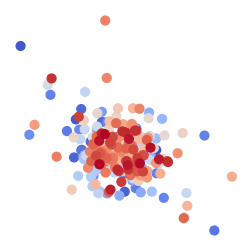

In [34]:
import numpy as np
fig = plt.figure(figsize=(3,3), dpi = 100)
ax = fig.add_subplot(111)
time_points = np.arange(marble_embedding.shape[0])
sc = ax.scatter(marble_embedding[:,0],
                marble_embedding[:,1],
           c=time_points,
           cmap='coolwarm', s=40)

ax.grid(False)
ax.set_axis_off()

In [35]:
def compute_smoothness(data):
    diff = np.diff(data, axis=0)
    bending_energy = np.sum(np.linalg.norm(diff, axis=1)**2)  ## conventional 1-degree time difference
    return 1/bending_energy   ### to ensure it is monotonic increasing properity 

compute_smoothness(marble_embedding[:])

0.05853319141249417

In [36]:
a = np.zeros(10)

In [37]:
a.shape

(10,)

In [40]:
run run_sim.py


---- Embedding dimension: 100
---- Signal dimension: 100
---- Computing kernels ... 
---- Computing full spectrum ...
              (if this takes too long, then run construct_dataset()
              with number_of_eigenvectors specified) 
---- Embedding dimension: 100
---- Signal dimension: 100
---- Computing kernels ... 
---- Computing full spectrum ...
              (if this takes too long, then run construct_dataset()
=== Run 01/10 ===h number_of_eigenvectors specified) 

---- Settings: 

epochs : 1000
hidden_channels : [32]
out_channels : 10
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
dropout : 0.0
batch_norm : batch_norm
bias : True
order : 2
diffusion : True
frac_sampled_nb : -1
include_positions : False
include_self : True
vec_norm : False
emb_norm : False
seed : 0
dim_signal : 100
dim_emb : 100
n_sampled_nb : -1

---- Number of features to pass to the MLP:  1010100
---- Total number of parameters:  32323627

Using device cuda:0

---- Training netwo